Goal
===

Build a predictive model that is able to predict the average mood of the user on the next day based on the data we obtained from the user on the days before.

In [41]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,5]

In [2]:
dateparse=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
df=pd.read_csv('dataset_mood_smartphone.csv', 
               header=1, 
               names=['uid','patient','time','variable','value'], 
               parse_dates=['time'], 
               date_parser=dateparse)

In [65]:
df.sample(10)

,uid,patient,time,variable,value
256054,292826,AS14.07,2014-04-16 07:42:43.500,appCat.communication,5.538000
38079,38081,AS14.32,2014-04-08 18:00:00.000,activity,0.034483
190418,1427451,AS14.24,2014-06-01 00:42:31.319,appCat.builtin,3.022000
12431,12433,AS14.07,2014-04-10 21:00:00.000,circumplex.valence,1.000000
195911,151837,AS14.25,2014-05-07 17:31:19.084,appCat.builtin,2.063000
195923,151855,AS14.25,2014-05-07 20:15:06.071,appCat.builtin,9.244000
221870,206548,AS14.30,2014-04-26 02:16:23.950,appCat.builtin,63.577000
153590,220741,AS14.02,2014-04-11 23:03:49.740,appCat.builtin,5.046000
10583,10585,AS14.30,2014-03-29 09:00:00.000,circumplex.arousal,-2.000000
293642,397452,AS14.27,2014-04-08 22:35:29.357,appCat.communication,15.086000


In [4]:
# how many patients?
df.patient.unique().size

27

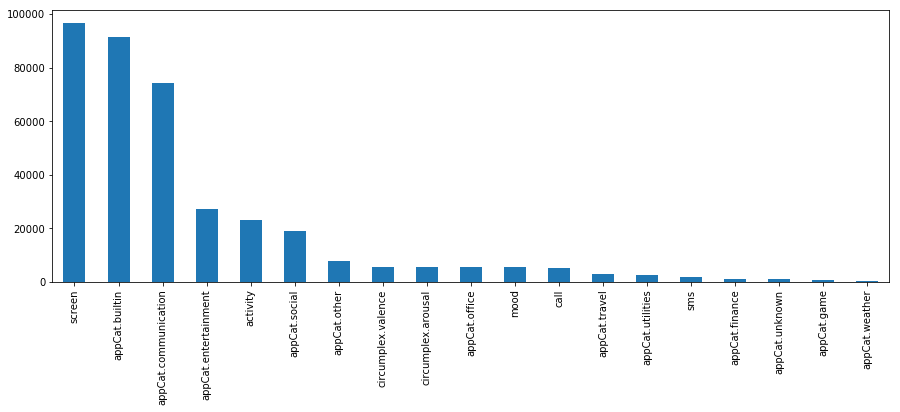

In [42]:
# which are the popular variables?
pd.DataFrame(df.variable.value_counts()).plot.bar(legend=None);

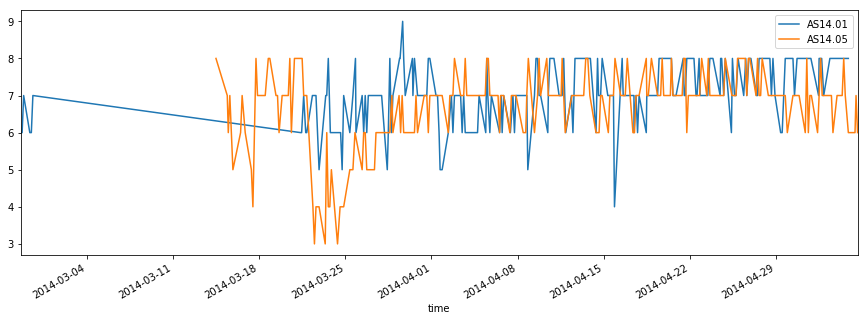

In [64]:
#look at a couple of patients' mood over time
fig, ax = plt.subplots()
for key, grp in df[(df.patient.isin(['AS14.01','AS14.05'])) & (df.variable=='mood')].groupby(['patient']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='value', label=key)
plt.show()

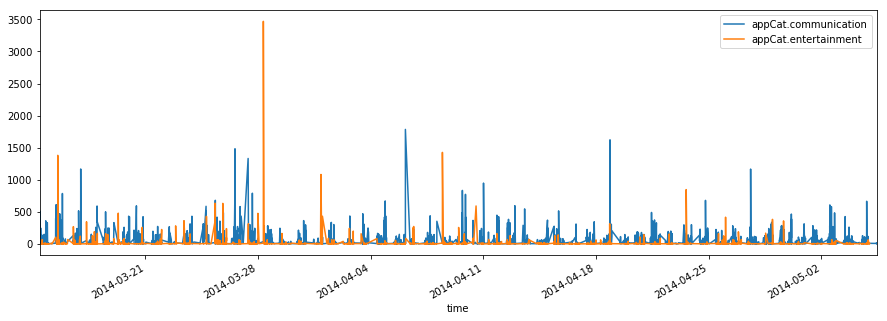

In [95]:
# look at the usage of a couple of apps of that patient with the dropped mood
fig, ax = plt.subplots()
for key, grp in df[(df.patient.isin(['AS14.05'])) & (df.variable.isin(['appCat.entertainment','appCat.communication']))].groupby(['variable']):
    ax = grp.plot(ax=ax, kind='line', x='time', y='value', label=key)
plt.show()